# Домашнее задание к лекции «Задачи классификации и кластеризации»

**Задание**

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Загружаем датасет с цветками Ириса
iris = load_iris()

In [3]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
#2. Оставляем два признака - sepal_length и sepal_width
to_drop = ['petal length (cm)','petal width (cm)']
data.drop(to_drop, axis=1, inplace=True)
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [5]:
# и целевую переменную - variety
variety = iris.target
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# 3. разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, random_state=42)

In [7]:
# 4. Строим модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
lda = LinearDiscriminantAnalysis()

In [9]:
# обучаем
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

In [11]:
# расчитываем точность
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_test, lda.predict(X_test))

0.868421052631579

In [13]:
# и коэффициенты дискриминатных линий
lda.coef_

array([[-5.83421967,  8.36880937],
       [ 1.5215595 , -3.81430503],
       [ 3.81202284, -3.79343242]])

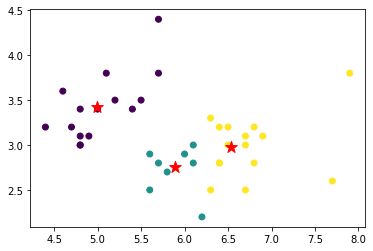

In [14]:
#5. Визуалзируем предсказания для тестовой выборки
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))
# и центры классов
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

In [15]:
# приводим данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
# Отбросываем целевую переменную и оставляем только два признака - sepal_length и sepal_width
X_scaled = scaler.fit_transform(X_train)
X_scaled

array([[-1.01827123,  1.2864604 ],
       [-0.7730102 ,  2.43545215],
       [-0.03722712, -0.78172474],
       [ 0.20803391,  0.8268637 ],
       [ 1.06644751,  0.13746866],
       [-0.52774918,  1.97585545],
       [-0.52774918,  1.51625875],
       [-0.40511866, -1.47111979],
       [ 0.57592545, -0.55192639],
       [ 0.69855596,  0.13746866],
       [ 0.94381699, -0.09232969],
       [ 1.67960008,  1.2864604 ],
       [-0.15985763, -0.32212804],
       [ 2.17012213, -0.09232969],
       [-0.28248815, -0.09232969],
       [-0.89564072,  1.05666205],
       [ 2.29275265, -0.55192639],
       [-0.03722712, -0.78172474],
       [-0.7730102 ,  0.8268637 ],
       [-1.01827123,  1.05666205],
       [-0.89564072,  1.7460571 ],
       [-1.01827123, -2.39031318],
       [ 0.57592545, -0.78172474],
       [-1.26353226,  0.8268637 ],
       [-1.01827123, -0.09232969],
       [-0.89564072,  0.59706535],
       [-0.28248815, -0.78172474],
       [-0.89564072,  0.8268637 ],
       [-0.15985763,

Text(0, 0.5, 'Инерция')

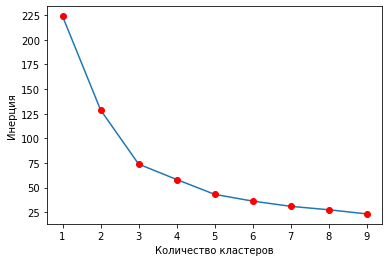

In [18]:
#Подбираем оптимальное число кластеров для алгоритма kmeans через визуализацию на графике локтя
from sklearn.cluster import KMeans
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')

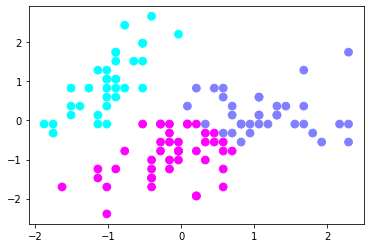

In [19]:
#Визуализируем кластеризацию
# на основе графика локтя указываем 3 кластера
kmeans = KMeans(n_clusters=3)
# Обучаем и каждому объекту присваиваеи кластер
clusters = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='cool', c=clusters, s=60)